<a href="https://colab.research.google.com/github/MeetGhasadiya/scholarship-prediction-app/blob/main/scholarship_eda_and_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel("dataset_combined.xlsx")
df.head()

,Name,Education Qualification,Gender,Community,Religion,Exservice-men,Disability,Sports,Annual-Percentage,Income,India,Outcome
0,INSPIRE Scholarship 2022-23 ? Scholarship for ...,Undergraduate,Male,General,Hindu,Yes,Yes,Yes,90-100,Upto 1.5L,In,1
1,INSPIRE Scholarship 2022-23 ? Scholarship for ...,Undergraduate,Male,General,Hindu,Yes,Yes,No,90-100,Upto 1.5L,In,1
2,INSPIRE Scholarship 2022-23 ? Scholarship for ...,Undergraduate,Male,General,Muslim,Yes,Yes,Yes,90-100,Upto 1.5L,In,1
3,INSPIRE Scholarship 2022-23 ? Scholarship for ...,Undergraduate,Male,General,Muslim,Yes,Yes,No,90-100,Upto 1.5L,In,1
4,INSPIRE Scholarship 2022-23 ? Scholarship for ...,Undergraduate,Male,General,Chirstian,Yes,Yes,Yes,90-100,Upto 1.5L,In,1


In [ ]:
df.shape

(245760, 12)

In [ ]:
df.columns

Index(['Name', 'Education Qualification', 'Gender', 'Community', 'Religion',
       'Exservice-men', 'Disability', 'Sports', 'Annual-Percentage', 'Income',
       'India', 'Outcome'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245760 entries, 0 to 245759
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Name                     245760 non-null  object
 1   Education Qualification  245760 non-null  object
 2   Gender                   245760 non-null  object
 3   Community                245760 non-null  object
 4   Religion                 245760 non-null  object
 5   Exservice-men            245760 non-null  object
 6   Disability               245760 non-null  object
 7   Sports                   245760 non-null  object
 8   Annual-Percentage        245760 non-null  object
 9   Income                   245760 non-null  object
 10  India                    245760 non-null  object
 11  Outcome                  245760 non-null  int64 
dtypes: int64(1), object(11)
memory usage: 22.5+ MB


In [ ]:
df.isnull().sum()

,0
Name,0
Education Qualification,0
Gender,0
Community,0
Religion,0
Exservice-men,0
Disability,0
Sports,0
Annual-Percentage,0
Income,0


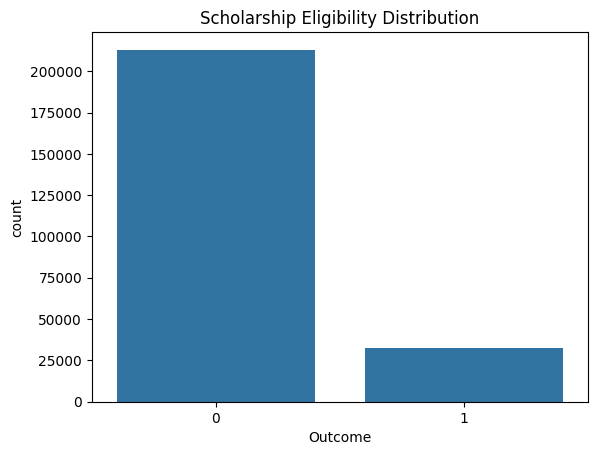

In [ ]:
sns.countplot(x="Outcome", data=df)
plt.title("Scholarship Eligibility Distribution")
plt.show()

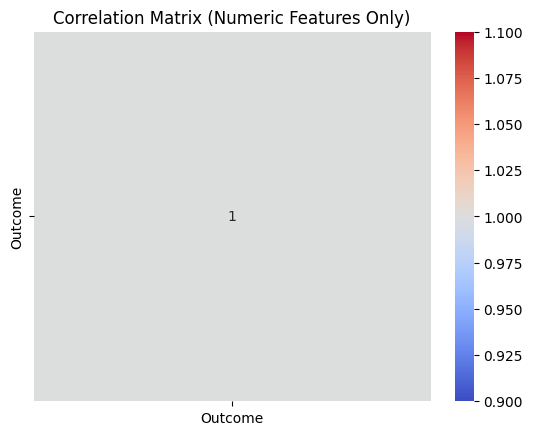

In [ ]:
numeric_df = df.select_dtypes(include=['int64','float64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix (Numeric Features Only)")
plt.show()

In [ ]:
numeric_df.columns


Index(['Outcome'], dtype='object')

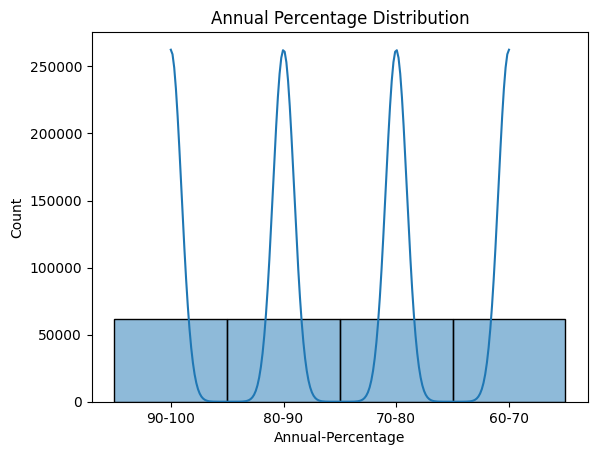

In [ ]:
sns.histplot(df["Annual-Percentage"], kde=True)
plt.title("Annual Percentage Distribution")
plt.show()


In [ ]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [ ]:
X = pd.get_dummies(X)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

1.0


In [ ]:
model.predict_proba(X_test)

array([[1.  , 0.  ],
       [0.98, 0.02],
       [1.  , 0.  ],
       ...,
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ]])

In [ ]:
import pickle

pickle.dump(model, open("scholarship_model.pkl","wb"))

In [ ]:
pickle.dump(X.columns, open("columns.pkl","wb"))